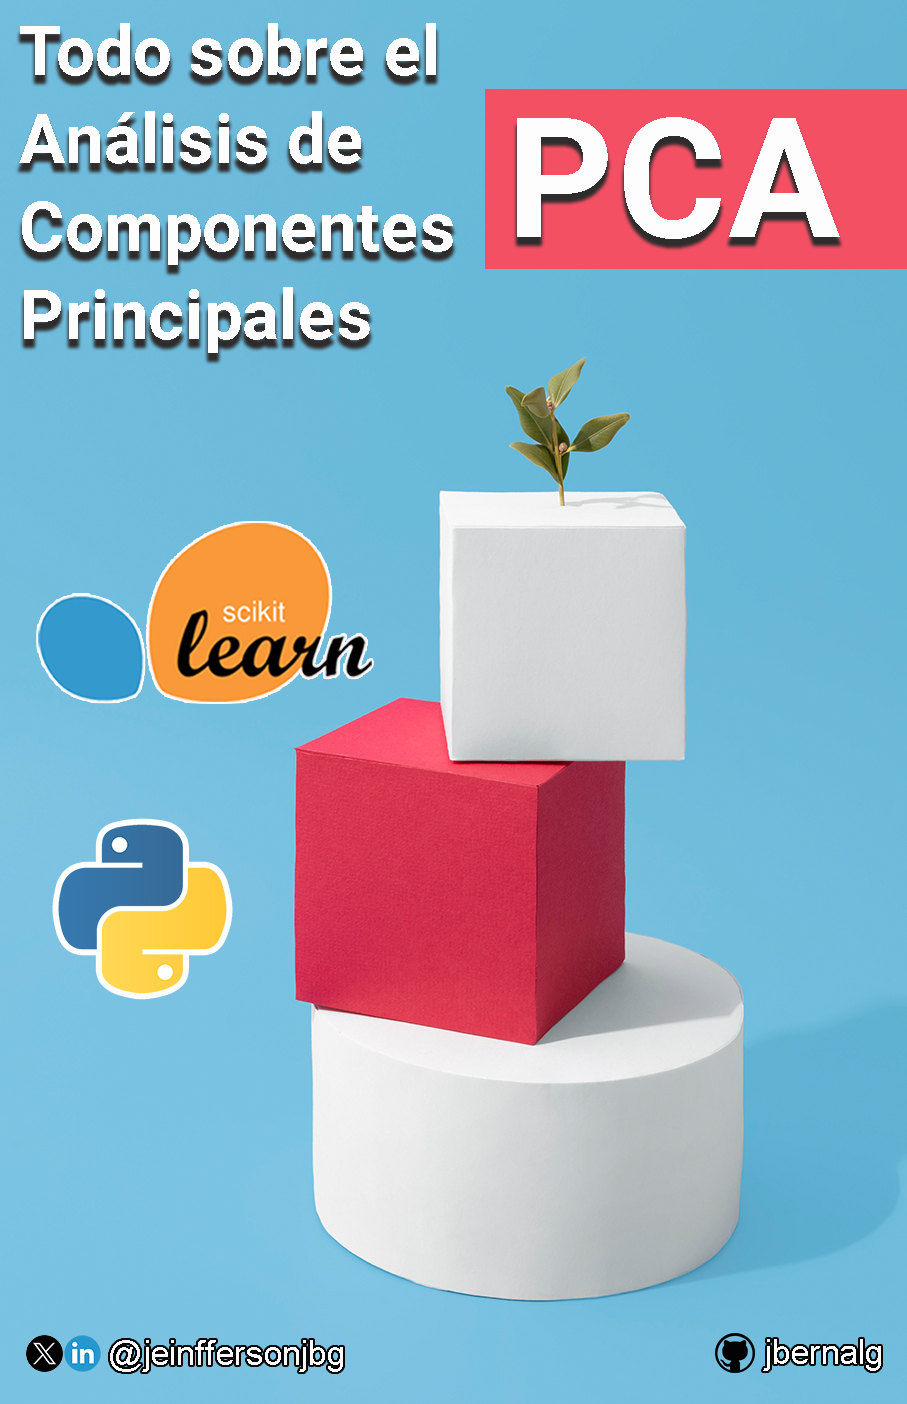

# __Todo sobre el Análisis de Componentes Principales (PCA)__

## Qué es?

PCA transforma un conjunto de variables posiblemente correlacionadas en un nuevo conjunto de variables no correlacionadas llamadas componentes principales, que están ordenadas por la cantidad de varianza que explican en los datos.

Sus principales usos en Machine Learning son:

- Reducción de dimensionalidad. Reduce el número de variables en un conjunto de datos sin perder demasiada información.

- Visualización de datos. Puedes proyectar datos de alta dimensión en 2D o 3D para visualizar patrones.

- Eliminación de ruido. Al consevar sólo las componentes que capturan la mayor variabilidad, se pueden eliminar las componentes asociadas al ruido.

- Preprocesamiento para algoritmos de ML. Útil para reducir el tiempo de entrenamiento y evitar overfitting.

- Compresión de datos. Reduce el tamaño de almacenamiento y mejora la eficiencia al codificar los datos en un espacio de menor dimensión.

## Cómo Funciona?

Supongamos que tenemos un dataset con sólo 2 variables (__x1__ y __x2__) y 3 observaciones (A, B y C):

| Observación | x1 | x2 |
| ----------- | -- | -- |
| A           | 2  | 4  |
| B           | 0  | 0  |
| C           | -2 | -4 |

Vemos que __x2__ es el doble de __x1__ , es decir, ambas variables esta correlacionadas. PCA detectará esta correlación.

### Paso 1: _Estandarizar los datos_

Realizamos este proceso para que PCA no esté sesgado por las escalas de las variables. Utilizamos la fórmula de la desviación estándar ($z$) y de la varianza poblacional ($\sigma$) ya que son pocos datos:

$$z = \frac{x - \overline{x}}{\sigma}$$

$$\sigma = \sqrt{\frac{1}{n}\sum (x_{i} - \overline{x})^{2}}$$

Calculamos la media y desviación estándar de cada variable:

__Para x1__

- _Media de x1_: (2+0+(-2))/3 = 0
- _std de x1_:
    - Resta la media a cada dato y eleva al cuadrado:
        
        (2-0)^2 = 4
        
        (0-0)^2 = 0
        
        (-2-0)^2 = 4
        
    - Promedia lo cuadrados dividiendo entre _n_
        
        varianza = (4 + 0 + 4)/3 = 8/3
        
    - Sacar la raiz cuadrada
        
        std = sqrt(varianza) = (8/3)^1/2 = 1.632


__Para x2__

- _Media de x2_: (4+0+(-4))/3 = 0      
- _std de x2_:
    - Resta la media a cada dato y elevar al cuadrado:
        
        (4-0)^2 = 16
        
        (0-0)^2 = 0
        
        (-4-0)^2 = 16
        
    - Promedia lo cuadrados dividiendo entre _n_
        
        varianza = (16 + 0 + 16)/3 = 32/3
        
    - Sacar la raiz cuadrada
        
        std = sqrt(varianza) = (32/3)^1/2 = 3.266
        
    
Ahora, estandarizamos los datos

| Observación | x1\_std           | x2\_std           |
| ----------- | ----------------- | ----------------- |
| A           | 2 / 1.632 ≈ 1.225 | 4 / 3.266 ≈ 1.225 |
| B           | 0                 | 0                 |
| C           | -1.225            | -1.225            |



### Paso 2: _Calcular Matriz de Covarianza_

Es una matriz cuadrada donde cada valor muestra **cuánto varían dos variables juntas**: Los valores de la diagonal representan la **varianza** de cada variable, mientras que los valores que estan fuera de la diagonal representan la **covarianza entre pares de variables**.

PCA busca encontrar **las direcciones (componentes)** donde los datos tienen mayor **varianza** y **menor redundancia**. Para eso, necesita saber:

- Qué variables están **correlacionadas**.
- Cuánta **varianza total** hay en el sistema.

 La **matriz de covarianza nos da exactamente esa información**. El procedimiento para calcularla es el siguiente:

Tomamos los datos estandarizados y formamos la matriz $Z$:

$$Z = \begin{bmatrix}
1.225  & 1.225 \\
 0 &  0\\
 -1.225 & -1.225 \\
\end{bmatrix}$$

La fórmula de la matriz de covarianza viene dada por:

$$Cov = \frac{1}{n-1}Z^{T}Z$$

donde:

- $Z^{T}$: es la transpuesta de $Z$.
- $n$: es el número de observaciones (en este caso, 3).

Tranponemos la matriz $Z$, pasando filas a columnas y viceversa.

$$Z^{T} = \begin{bmatrix}
1.225 & 0 & -1.225 \\
1.225 & 0 & -1.225 \\
\end{bmatrix}$$

Realizamos la operación de multiplicación de matrices

$$Z^{T}Z = \begin{bmatrix}
1.225 & 0 & -1.225 \\
1.225 & 0 & -1.225 \\
\end{bmatrix} \begin{bmatrix}
1.225  & 1.225 \\
 0 &  0\\
 -1.225 & -1.225 \\
\end{bmatrix}$$

Y calculamos cada elemento de la operación:

- **[1,1]**: (1.225)(1.225)+0+(−1.225)(-1.225)=1.5+0+1.5=3
- **[1,2]**: igual que [1,1] ⇒ 3
- **[2,1]**: también 3 (simétrico)
- **[2,2]**: también 3

Entonces,

$$ Z^{T}\cdot Z = \begin{bmatrix}
3 & 3 \\
3 & 3 \\
\end{bmatrix}$$

Ahora, dividimos por $n=3$ y obtenemos la __Matriz de Covarianza__

$$ Cov = C = \begin{bmatrix}
1 & 1 \\
1 & 1 \\
\end{bmatrix}$$


### Paso 3: _Calcular autovalores y autovectores_

Los autovalores nos dicen cuánta varianza captura cada componente; Mientras que lo autovectores indican la dirección de cada componente.

Para calcular los autovalores utilizamos la siguiente ecuación:

$$det(\mathbf{C} - \lambda\mathbf{I}) = 0$$

donde

$$C = \begin{bmatrix}
1 & 1 \\
1 & 1 \\
\end{bmatrix}, \mathbf{I} = \begin{bmatrix}
1 & 0 \\
0 & 1 \\
\end{bmatrix}$$

Entonces,

$$\begin{vmatrix}
1-\lambda & 1 \\
1 &  1-\lambda\\
\end{vmatrix} = (1 - \lambda)^{2} - 1 = 0$$

Resolviendo la matriz tenemos:

$$(1 - \lambda)^{2} = 1 \Rightarrow  1 - \lambda = \pm  1$$

Por tanto, los autovalores son:

$$\lambda_{1} = 2, \lambda_{2} = 0$$

Ahora, procedemos a calcular los autovectores $\mathbf{v_{1}}$ y $\mathbf{v_{2}}$:

- **Para $\lambda_{1} = 2$**

$$(\mathbf{C} - \lambda_{1}\mathbf{I})\mathbf{v_{1}} = 0$$

$$\begin{bmatrix}
-1 & 1 \\
1 & -1 \\
\end{bmatrix} \cdot \begin{bmatrix}
\mathbf{v_{1}} \\ \mathbf{v_{2}}
\end{bmatrix} = \begin{bmatrix}
0 \\ 0
\end{bmatrix}$$

nos lleva a la ecuación,

$$-v_{1} + v_{2} = 0 \Rightarrow v_{1} = v_{2}$$

Entonces,

$$\mathbf{v_{1}} = \begin{bmatrix}
1 \\ 1
\end{bmatrix}$$

Normalizando, obtenemos el autorvector $\mathbf{v_{1}}$, 

$$\mathbf{v_{1}} = \frac{1}{\sqrt{2}}\begin{bmatrix}
1 \\ 1
\end{bmatrix} = \begin{bmatrix}
0.707 \\ 0.707
\end{bmatrix}$$

- **Para $\lambda_{2} = 0$**

$$(\mathbf{C} - \lambda_{2}\mathbf{I})\mathbf{v_{2}} = \begin{bmatrix}
1 & 1 \\
1 & 1 \\
\end{bmatrix} \cdot \begin{bmatrix}
\mathbf{v_{1}} \\ \mathbf{v_{2}}
\end{bmatrix} = \begin{bmatrix}
0 \\ 0
\end{bmatrix}$$

nos lleva a la ecuación,

$$v_{1} + v_{2} = 0 \Rightarrow v_{1} = -v_{2}$$

Un vector solución sería,

$$\mathbf{v_{2}} = \begin{bmatrix}
1 \\ -1
\end{bmatrix}$$

Normalizando, obtenemos el autorvector $\mathbf{v_{2}}$

$$\mathbf{v_{2}} = \frac{1}{\sqrt{2}}\begin{bmatrix}
1 \\ -1
\end{bmatrix} = \begin{bmatrix}
0.707 \\ -0.707
\end{bmatrix}$$

### Paso 4: _Tranformar los datos_

Proyectamos los datos en los nuevos ejes dados por los componentes principales. Para ello, utilizamos la siguiente fórmula:

$$Z_{PCA} = Z \cdot \text{Matriz de autovectores}$$

Sustituyendo, tenemos:

$$Z_{PCA} = \begin{bmatrix}
1.225 & 1.225 \\
0 & 0 \\
-1.225 & -1.225 \\
\end{bmatrix} \cdot \begin{bmatrix}
0.707 & -0.707 \\
0.707 & 0.707 \\
\end{bmatrix} = \begin{bmatrix}
1.733 & 0 \\
0 & 0 \\
-1.733 & 0 \\
\end{bmatrix}$$

__Conclusiones__

A partir de la nueva matriz $Z_{PCA}$ podemos concluir lo siguiente:

- Sólo la primer componente $(PC1)$ tiene valores distinto de cero. Esto indica que toda la información esta en 1 sola dimensión.
 
- La segunda componente $(PC2)$ no agrega nada útil: toda su varianza es cero. 

- Esto implica que podemos reducir de 2 a 1 dimensión sin perder información.

## Implementando PCA con Scikit-Learn

Vamos a trabaja con los datos de Iris que consta de cuatro características: longitud del sépalo, ancho del sépalo, longitud del pétalo y ancho del pétalo. Utilizamos el análisis de componentes principales (PCA) para proyectar este espacio de cuatro características en un espacio tridimensional.

### Cargar datos

In [ ]:
from sklearn.datasets import load_iris

# a_frame, muestra los datos en formato df
iris = load_iris(as_frame=True)
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### Gráfico de pares de características

In [2]:
iris.frame['target']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

El target esta identificado con números enteros para cada especie. Vamos a renombrar el target con el nombre real de las especies.

In [3]:
iris.frame['target'] = iris.target_names[iris.target]
iris.frame['target']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: target, Length: 150, dtype: object

Graficamos pares de características de todas las especies entre sí.

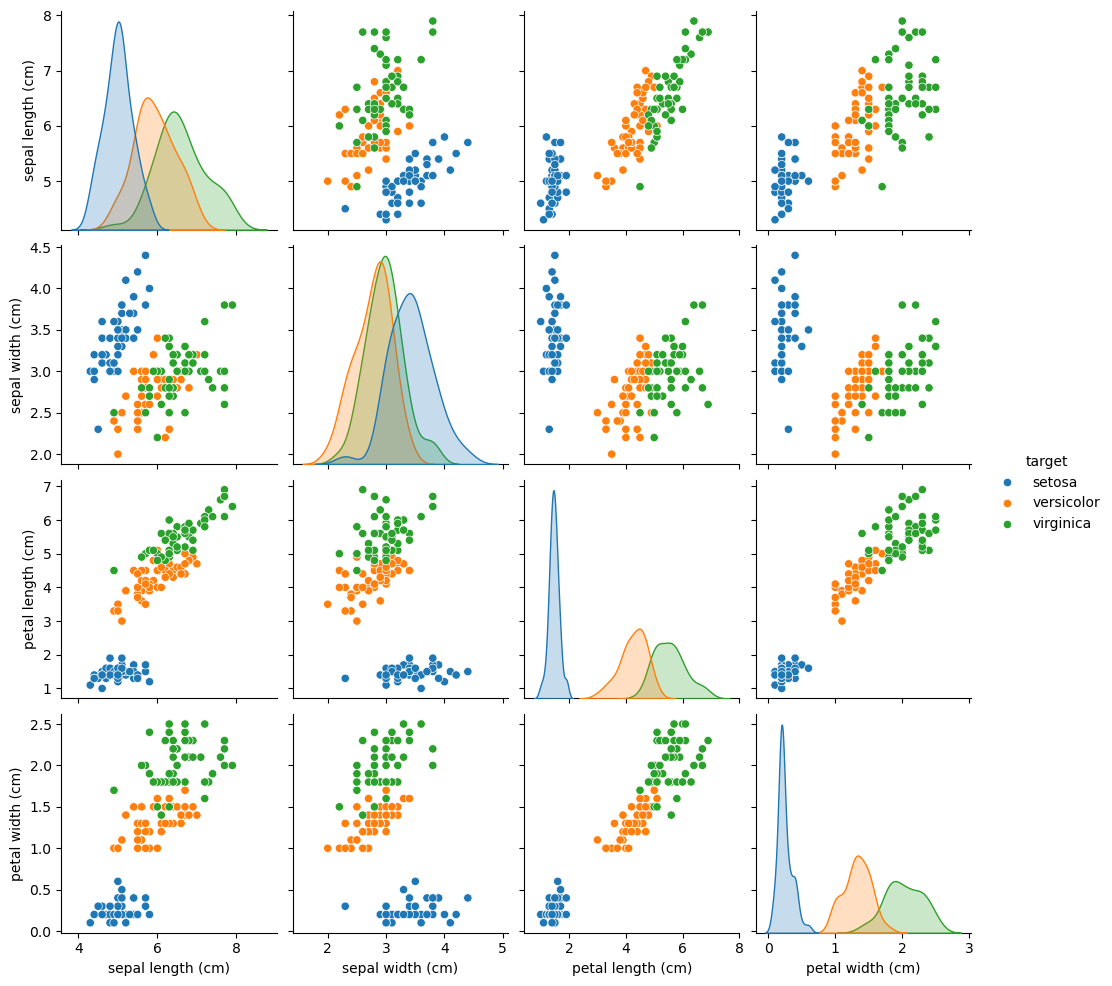

In [4]:
import seaborn as sns

_ = sns.pairplot(iris.frame, hue='target')

> Ya se puede observar un patrón en el tipo Setosa, fácilmente identificable por su sépalo corto y ancho. 

> Considerando únicamente estas dos dimensiones (ancho y largo del sépalo), aún existe una superposición entre los tipos Versicolor y Virginica.

> Observamos que el ancho y la longitud del pétalo son las características más discriminantes para los tres tipos.

### Representación Gráfica PCA

Apliquemos un Análisis de Componentes Principales (PCA) al conjunto de datos del iris para pasar de 4 a 3 dimensiones y luego grafiquemos los iris en las tres primeras dimensiones del PCA. Esto nos permitirá diferenciar mejor los tres tipos.

In [7]:
from sklearn.decomposition import PCA

# aplicar PCA para reducir a 3d
pca = PCA(n_components=3)

X_reduce = pca.fit_transform(iris.data)

# mostrar primeras 3 transformaciones
X_reduce[:3]

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026]])

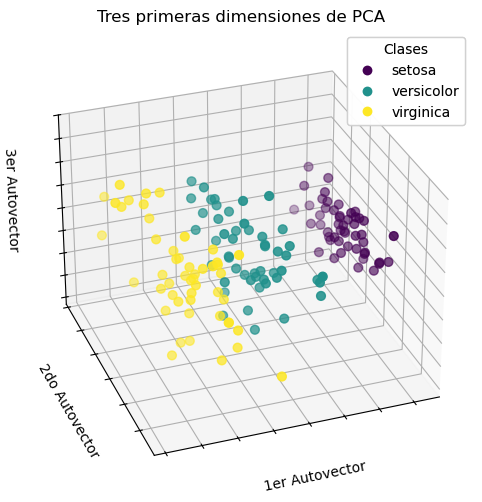

In [28]:
import matplotlib.pyplot as plt

# crear grafico
fig = plt.figure(1, figsize=(8,6))
# elev y azim definen el angulo de la vista
ax = fig.add_subplot(111, projection='3d', elev=-150, azim=110)

# Graficar datos en 3D
scatter = ax.scatter(
    X_reduce[:, 0],
    X_reduce[:, 1],
    X_reduce[:, 2],
    c=iris.target,  # colorear cada punto segun la clase
    s=40            # size de los puntos
)

ax.set(
    title = 'Tres primeras dimensiones de PCA',
    xlabel = '1er Autovector',
    ylabel = '2do Autovector',
    zlabel = '3er Autovector',
)

# ocultar etiquetas numericas en los ejes
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

# agregar leyenda
leyend1 = ax.legend(
    scatter.legend_elements()[0],
    iris.target_names.tolist(),
    loc='upper right',
    title='Clases'
)
ax.add_artist(leyend1)

plt.show()


> PCA crea tres nuevas características que son una combinación lineal de las cuatro características originales.

> Esta transformación maximiza la varianza lo que permite identificar cada especie utilizando únicamente la primera característica

Analicémos la variabilidad de los datos en los diferentes PCs.

In [8]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

> Vemos que el 92% de la variabilidad de los datos es explicada por el primer PCs. Esto sugiere que una sóla componente explica la variación del 92% de los datos.

## Entendiendo PCA desde la intuición

Vamos a generar un pequeño conjunto de datos 3D, con forma ovalada, rotada y con puntos distribuidos de forma irregular con bastante ruido.

In [1]:
import numpy as np
from scipy.spatial.transform import Rotation

# cantidad de puntos a generar
m = 60
# crea los puntos en 3D
X = np.zeros((m, 3))  
# semilla
np.random.seed(42)
# distribuye los puntos en una curva tipo elipse
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi  
# asigna las coordenadas 2D del plano x,y (forma ovalada)
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5
# agrega ruido a cada componente x,y,z
X += 0.28 * np.random.randn(m, 3)  # add more noise
# crea una rotacion 3D a los datos
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
# mueve el centro de la nube de puntos
X += [0.2, 0, 0.2]  

Los datos graficados en 3 dimensiones, se ven de la siguiente forma:

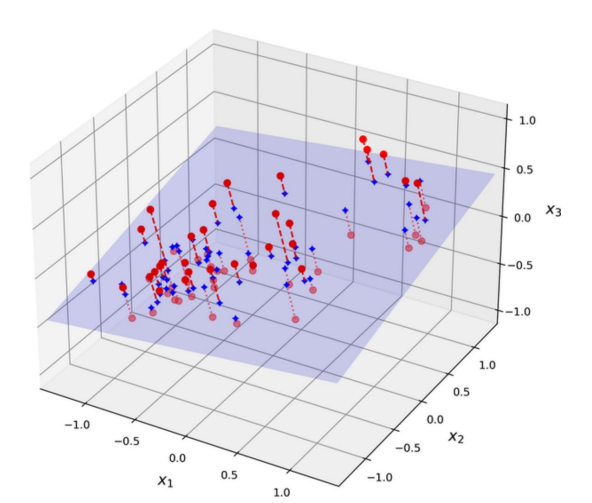

El objetivo de PCA es encontrar un hiperplano que logre capturar, lo maximo posible, la variacion de los datos. El grafico anterior, muestra dicho plano y en éste se proyectan los datos. Si llevamos el plano a 2 dimensiones obtenemos:

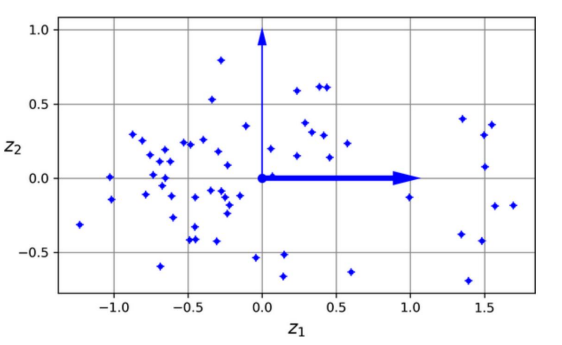

### Obtener las componentes principales con _SVD_

Detrás del método PCA se encuentra el algoritmo de Descomposición de Valores Singulares (SVD). Su objetivo es descomponer una matriz en tres componentes: $U$, $Σ$ y $V$, tales que 

$$X = UΣV^{T}$$

donde 
- $X$ es la matriz original de los datos.

- $U$ es una matriz de m × m de vectores ortogonales (Autovectores de $XX^{T}$). Sus columnas representan las direcciones de los datos en el espacio original. 

- $Σ$ es una matriz diagonal m × n con los autovalores ordenados de mayor a menor. Los elementos de la diagonal representan la variación que hay en cada dirección. Cuanto mayor es el valor, más importante es esa dirección para representar los datos. 

- $V^{T}$ es la transpuesta de la matriz de n × n de autovectores ($X^{T}X$). Representan las direcciones principales del espacio de característiscas. 


Vamos a obtener las componentes principales del conjunto de entrenamiento anterior con la función _svd()_ de Numpy. Para ello los datos deben esta centrados.

El objetivo es llevar los datos de 3 a 2 dimensiones, como se muestra en las graficas anteriores, encontrando el plano de proyección que mejor se ajuste a los datos. Dicho plano viene definido por las dos primeras PCs.

In [2]:
import numpy as np

# resta la media de cada columna a todos los datos para centrarlos
X_centered = X - X.mean(axis=0)

# aplicamos SVD
U, s, Vt = np.linalg.svd(X_centered)

# obtenemos las dos primeras PCs
c1 = Vt[0]
c2 = Vt[1]

print('Primera componente principal: ', c1)
print('Segunda componente principal: ', c2)

Primera componente principal:  [0.67857588 0.70073508 0.22023881]
Segunda componente principal:  [-0.72817329  0.6811147   0.07646185]


La función _svd()_ devuelve  $s$ en vez de $Σ$, donde '$s$' es el vector que contiene todos los autovalores en la diagonal principal de las _n_ primeras filas de $Σ$. Dado que $Σ$ está lleno de ceros en el resto de la matriz, se puede reconstruir fácilmente a partir de $s$, de la siguiente manera:

In [31]:
# definir numero de muestras y caracteristicas
m, n = X.shape
# crear matriz de ceros con la misma forma de X_centered
Σ = np.zeros_like(X_centered)
# inserta los autovalores de s en la diagonal
Σ[:n, :n] = np.diag(s)
# verificar que la descompoicion es valida
assert np.allclose(X_centered, U @ Σ @ Vt)

Mostrémos los matrices obtenidas de la descomposición.

In [32]:
print('Matriz U: ',U)
print('='*64)
print('Matriz de autovalores Σ: ',Σ)
print('='*64)
print('Matriz de autovectores: ',Vt)

Matriz U:  [[-0.14714487 -0.11089241 -0.02880011 ... -0.03805276 -0.03723821
  -0.2192027 ]
 [ 0.02508808  0.19383174 -0.24368813 ...  0.06826983  0.10135187
  -0.07801631]
 [ 0.22768873 -0.15038013 -0.09929828 ... -0.02809897  0.33694065
  -0.13209084]
 ...
 [-0.04977645 -0.06776359 -0.01171058 ...  0.99389532  0.00285825
  -0.00441331]
 [-0.10303688  0.04503911  0.3375688  ...  0.00478077  0.89469863
   0.03234272]
 [-0.17139152  0.05364348 -0.19282106 ... -0.01075476  0.05289398
   0.93195606]]
Matriz de autovalores Σ:  [[5.93449971 0.         0.        ]
 [0.         2.65661127 0.        ]
 [0.         0.         2.04831319]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0

Para proyectar el conjunto de entrenamiento en el hiperplano y obtener un conjunto de datos reducido $X_d$, calculamos la multiplicación matricial del conjunto de entrenamiento $X$ por la matriz $W_d$ definida como la matriz que contiene las primeras _d_ columnas de $V$.

$$X_{d-proj} = XW_d$$

Para nuestro ejemplo debemos obtener las 2 columnas de $V$. Veamos cómo hacerlo.


In [ ]:
# seleccionar dos primeras PCs y trasponerla
W2 = Vt[:2].T

# proyecta los datos centrados sobre las dos PCs
X2D = X_centered @ W2

# mostrar nuevo conjunto de datos reducidos a 2D
print(X2D)

[[-8.73231190e-01 -2.94598030e-01]
 [ 1.48885182e-01  5.14935573e-01]
 [ 1.35121872e+00 -3.99501548e-01]
 [ 4.54366763e-01 -1.39984497e-01]
 [-7.34389086e-01 -2.28934648e-02]
 [-2.33347464e-01 -8.67844755e-02]
 [-8.08435321e-01 -2.52457557e-01]
 [ 1.48281454e+00  4.22796305e-01]
 [ 3.85679006e-01 -6.16229365e-01]
 [ 1.54972180e+00 -3.60381563e-01]
 [-1.22938760e+00  3.12504780e-01]
 [-4.54653275e-01  3.28839370e-01]
 [ 1.34315899e+00  3.79446240e-01]
 [-6.55233341e-01 -1.92367174e-01]
 [-2.49510114e-01  1.28486810e-01]
 [-3.46562831e-01  8.32312189e-02]
 [-6.90221113e-01 -1.13712645e-01]
 [-5.29757591e-01 -2.40403321e-01]
 [-3.96344855e-01 -2.60334107e-01]
 [-6.19519220e-01 -1.13588889e-01]
 [ 3.34910399e-01 -3.09476565e-01]
 [-4.52441114e-01  1.28501562e-01]
 [-1.02718730e+00 -7.20555799e-03]
 [ 2.34128174e-01 -1.50077825e-01]
 [-3.37764152e-01 -5.30112382e-01]
 [ 1.69474397e+00  1.82984269e-01]
 [-1.09314174e-01 -3.51175914e-01]
 [ 4.35623436e-01 -6.12839802e-01]
 [ 2.35325731e-01 -5

> De esta forma pasamos los datos de 3 a 2 dimensiones, pero en un espacio de características en vez del espacio original. Es decir, los datos llevados a 2 dimensiones están representados en un espacio diferente al original. 

### Obtener las componentes principales con Scikit-Learn

Esta librería implementa PCA centrando los datos automáticamente. Vamos a reducir la dimensionalidad del conjunto de datos a 2 dimensiones, como hemos hecho en el pasado.

In [2]:
# importamos el metodo
from sklearn.decomposition import PCA

# instanciamos el objeto PCA
pca = PCA(n_components=2)

# reducir datos a 2 dimensiones
X2D = pca.fit_transform(X)

X2D

array([[-8.73231190e-01,  2.94598030e-01],
       [ 1.48885182e-01, -5.14935573e-01],
       [ 1.35121872e+00,  3.99501548e-01],
       [ 4.54366763e-01,  1.39984497e-01],
       [-7.34389086e-01,  2.28934648e-02],
       [-2.33347464e-01,  8.67844755e-02],
       [-8.08435321e-01,  2.52457557e-01],
       [ 1.48281454e+00, -4.22796305e-01],
       [ 3.85679006e-01,  6.16229365e-01],
       [ 1.54972180e+00,  3.60381563e-01],
       [-1.22938760e+00, -3.12504780e-01],
       [-4.54653275e-01, -3.28839370e-01],
       [ 1.34315899e+00, -3.79446240e-01],
       [-6.55233341e-01,  1.92367174e-01],
       [-2.49510114e-01, -1.28486810e-01],
       [-3.46562831e-01, -8.32312189e-02],
       [-6.90221113e-01,  1.13712645e-01],
       [-5.29757591e-01,  2.40403321e-01],
       [-3.96344855e-01,  2.60334107e-01],
       [-6.19519220e-01,  1.13588889e-01],
       [ 3.34910399e-01,  3.09476565e-01],
       [-4.52441114e-01, -1.28501562e-01],
       [-1.02718730e+00,  7.20555799e-03],
       [ 2.

> De esta forma obtenemos los datos llevados a 2 dimensiones.

El método _components_ permite obtener las componentes principales de forma directa.

In [3]:
pca.components_

array([[ 0.67857588,  0.70073508,  0.22023881],
       [ 0.72817329, -0.6811147 , -0.07646185]])

> Notemos que las componentes pricipales dadas por _PCA_ son las misma calculadas con la funcion _SVD_, son dos metodos para llegar al mismo resultado.

### Indice de varianza explicada

Indica cuánta proporción de la varianza total de los datos es explicada por cada componente principal. Es una medida fundamental para comprender qué tan bien resumen los datos cada componente en una reducción de dimensionalidad.

El índice de varianza explicada es un vector de proporciones

$$\text{explained variance ratio} = [v_{1}/V, v_{2}/V,..., v_{k}/V ]$$

Donde

- $v_{k}$ es la varianza explicada por el i-esimo componente.

- $V$ es la suma total de varianza explicada de los datos originales.

- La suma total de la varianza explicada es igual o cercano a 1.

Analíticamente se obtiene al calcular los autovalores $\lambda_{i}$ de la matriz de datos, cuyos valores explican la varianza en la componente de donde se obtuvo. Una vez obtenidos, se ordenan los autovalores de mayor a menor:

$$\lambda_{1}, \geq \lambda_{2}, \geq ... \geq \lambda_{n}$$

Y finalmente se procede a calcular el índice de varianza explicada, con la siguiente fórmula, para cada componente:

$$\text{explained variance ratio} = \frac{\lambda_i}{\sum_{j=1}^{n} \lambda_j} = \frac{v_{i}}{V}$$

En sklearn se implementa utilizando el método _explained_variance_ratio_. Veamos cómo obtener este índice para el ejemplo anterior.

In [4]:
pca.explained_variance_ratio_

array([0.7578477 , 0.15186921])

In [ ]:
# varianza de la tercera PC
1 - pca.explained_variance_ratio_.sum() 

> El primer valor indica que el 76% de la variacion del conjunto de datos se encuentra a lo largo de la primera PC

> El segundo valor indica que el 15% se encuentra a lo largo de la segunda PC.

> El restante 9% para la tercera PC, por lo que esta aporta poca información y no se toma en cuenta ya que corresponde a la dimension que se reduce.

### Selección del número de dimensiones correcto

#### Primera Forma

Para elegir el número de dimensiones que mayor variabilidad capture de los datos, sumamos una porcion suficientemente grande de la varianza explicada, suponga el 95% y se usa la cantidad de componentes principales que correspondan.

En el siguiente ejemplo, trabajamos con los datos anteriores, implementamos _PCA_ sin reducir la dimensionalidad y luego se calcula el número mínimo de dimensiones necesarias para preservar el 90% de la varianza.

In [6]:
# importamos el metodo
from sklearn.decomposition import PCA
import numpy as np

# instanciamos el objeto PCA
pca = PCA()
pca.fit_transform(X)

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.90) + 1
d

2

> Elegimos el 90% de la varianza debido a la poca cantidad de datos.

> Nos indica que las 2 primeras componentes principales son las necesarias para obtener el 90% de variabilidad.

Luego, podemos configurar _n_components_ con el valor encontrado y ejecutar PCA nuevamente.

#### Segunda Forma

También podemos pasarle como valor flotante el porcentaje de varianza que requerimos directamente en el parámetro _n_componentes_ de _PCA_. Esto hace que la cantidad de componentes se almacene en el atributo _n_components_.

In [7]:
pca = PCA(n_components=0.90)

X_reducido = pca.fit_transform(X)

pca.n_components_

2

In [10]:
X_reducido

array([[-8.73231190e-01,  2.94598030e-01],
       [ 1.48885182e-01, -5.14935573e-01],
       [ 1.35121872e+00,  3.99501548e-01],
       [ 4.54366763e-01,  1.39984497e-01],
       [-7.34389086e-01,  2.28934648e-02],
       [-2.33347464e-01,  8.67844755e-02],
       [-8.08435321e-01,  2.52457557e-01],
       [ 1.48281454e+00, -4.22796305e-01],
       [ 3.85679006e-01,  6.16229365e-01],
       [ 1.54972180e+00,  3.60381563e-01],
       [-1.22938760e+00, -3.12504780e-01],
       [-4.54653275e-01, -3.28839370e-01],
       [ 1.34315899e+00, -3.79446240e-01],
       [-6.55233341e-01,  1.92367174e-01],
       [-2.49510114e-01, -1.28486810e-01],
       [-3.46562831e-01, -8.32312189e-02],
       [-6.90221113e-01,  1.13712645e-01],
       [-5.29757591e-01,  2.40403321e-01],
       [-3.96344855e-01,  2.60334107e-01],
       [-6.19519220e-01,  1.13588889e-01],
       [ 3.34910399e-01,  3.09476565e-01],
       [-4.52441114e-01, -1.28501562e-01],
       [-1.02718730e+00,  7.20555799e-03],
       [ 2.

#### Tercera Forma

Otra opción es trazar la varianza explicada como función del número de dimensiones. Generalmente habrá un codo en la curva, donde la varianza explicada deja de crecer rápidamente. La siguiente gráfica corresponde a la varianza en función de las dimensiones para el conjunto de datos MNIST que son imágenes constituidas por 784 píxeles (features). Se evidencia que reducir la dimensionalidad a 154 dimensiones no peredería demasiada varianza explicada.

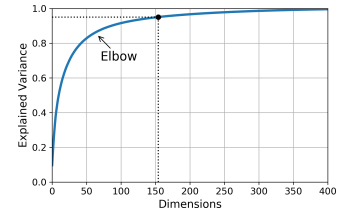

## PCA para compresión

Para ver de qué se trata la compresión de datos, volvamos al ejemplo de _PCA_ en los datos de Iris sabiendo que podemos reducirlos a 1 dimensión ya que un sólo PCs contiene más del 90% de la variación.

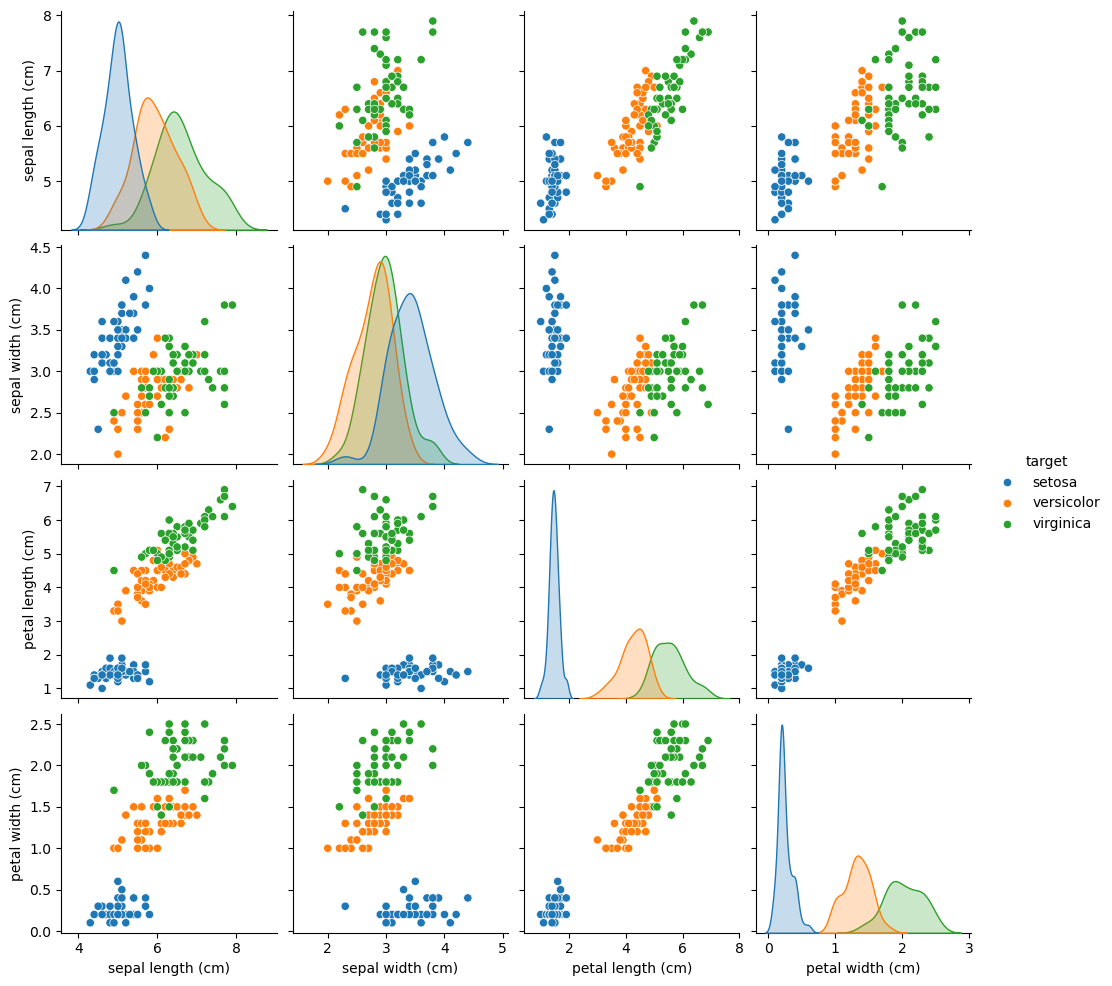

In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

# as_frame, muetra los datos en formato df
iris = load_iris(as_frame=True)

# agregar al dataframe las etiquetas
iris.frame['target'] = iris.target_names[iris.target]

# visualizar la distribucion de cada par de variables
_ = sns.pairplot(iris.frame, hue='target')


> La visualización muestra la distribución de los datos entre dos variables. Como no se puede visualizar las 4 dimensiones, optamos por visualizarlos en 2. 

In [2]:
# aplicar PCA para reducir a 1d
pca = PCA(n_components=1)
X_reduce = pca.fit_transform(iris.data)

# mostrar primeras 3 transformaciones
X_reduce[:3]

array([[-2.68412563],
       [-2.71414169],
       [-2.88899057]])

Ahora, volvamos a los datos originales descomprimiendo los datos reducidos por _PCA_.

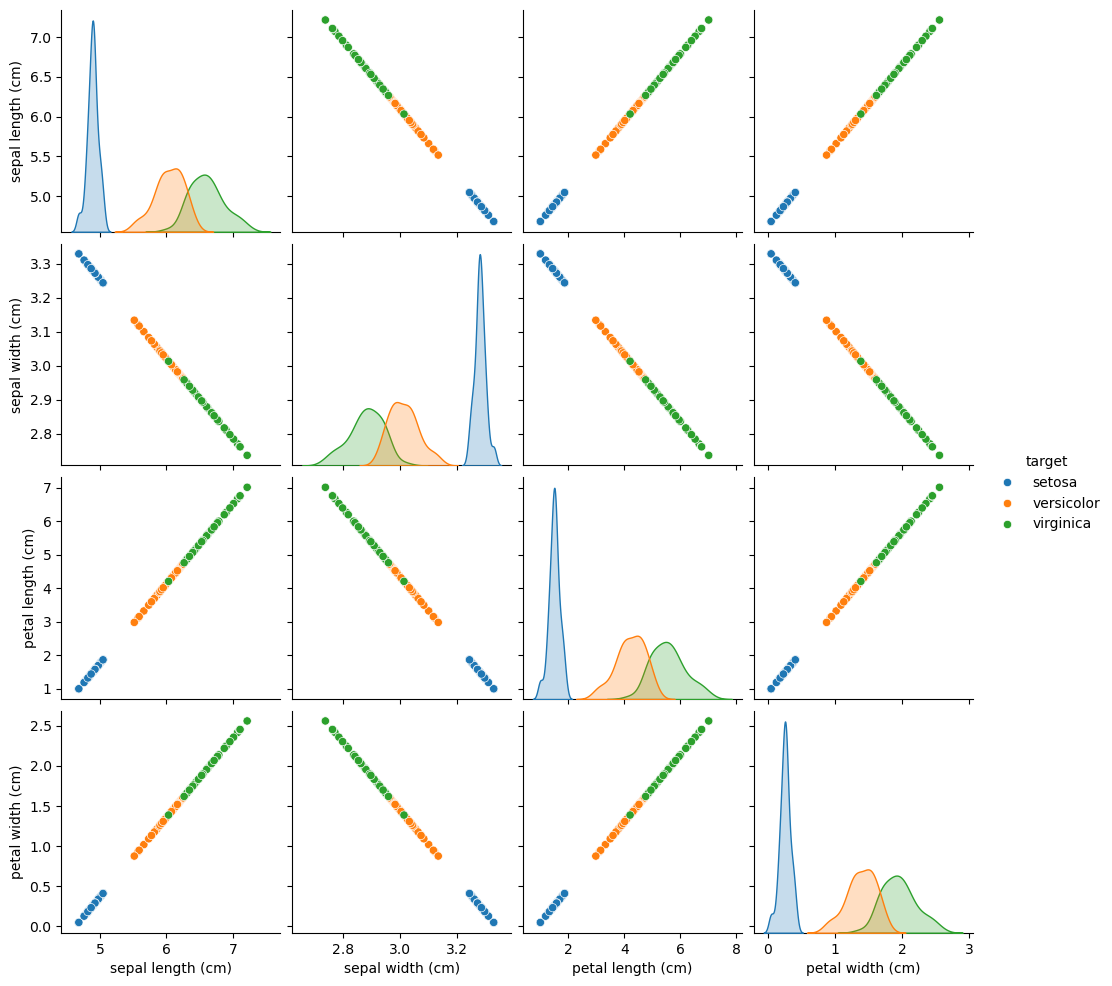

In [3]:
# reconstruir los datos originales desde PCA
X_recuperado = pca.inverse_transform(X_reduce)

# convertir en dataframe los datos recuperados
df_rec = pd.DataFrame(X_recuperado, columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])

# agregar al dataframe las etiquetas
iris.frame['target'] = iris.target_names[iris.target]
df_rec['target'] = iris.frame['target']

# visualizar cada par de variables
_ = sns.pairplot(df_rec, hue='target')

> La visualización muestra que los datos se alinean sobre líneas diagonales. Esto se debe a que al reducir a 1 dimensión, sólo se conserva la dirección de mayor varianza.

> Al reconstruir los datos, pasando de 1 a 4 dimensiones, se ubican en la dirección de mayor varianza.

> Los datos ahora están altamente correlacionados y sus distribuciones ahora se encuentran mucho más diferenciables.

Otro ejemplo es aplicar PCA al conjunto de datos MNIST para pasar de 784 a 154 características. Esta reducción preseva el 95% de varianza de los datos llegando a menos del 20% de su tamaño original. Esta es una relación de compresion razonable lo cual aceleraría enormemente un algoritmo de clasificación.

La siguiente imagen muestra algunos digitos de MNIST del conjunto de entrenamiento original y los digitos después de la compresión y descompresión. Se nota una ligera pérdida de calidad de la imagen, pero los dígitos se mantienen intactos y diferenciables.

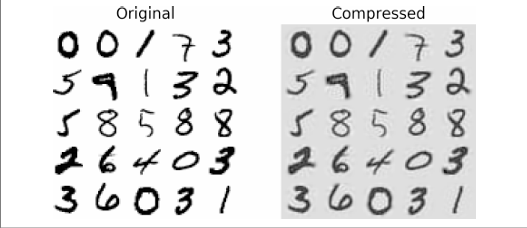

## PCA Incremental

IPCA se utiliza generalmente como sustituto del análisis de componentes principales (PCA) cuando el conjunto de datos a descomponer es demasiado grande para caber en la memoria.  Si bien sigue dependiendo de las características de los datos de entrada, modificar el tamaño del lote permite controlar el uso de la memoria.

PCA requiere que todos el conjunto de entrenamiento quepa en la memoria para que se pueda ejecutar el algoritmo. Es por esto que surge IPCA, ya que permite dividir los datos en minilotes y alimentar el algoritmo en un minilote a la vez.

### PCA vs IPCA

El siguiente ejemplo muestra de forma visual que el _IPCA_ es capaz de encontrar una proyección de datos similar a la del PCA, procesando solo unas pocas muestras a la vez.

Vamos a utilizar los datos de Iris pero en este caso vamos a pasar de 4 a 2 dimensiones.

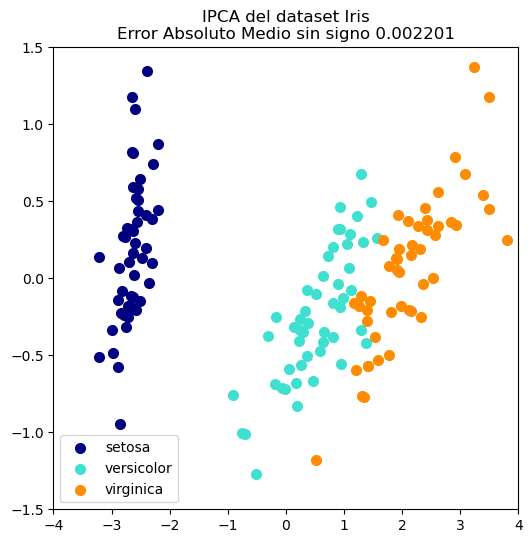

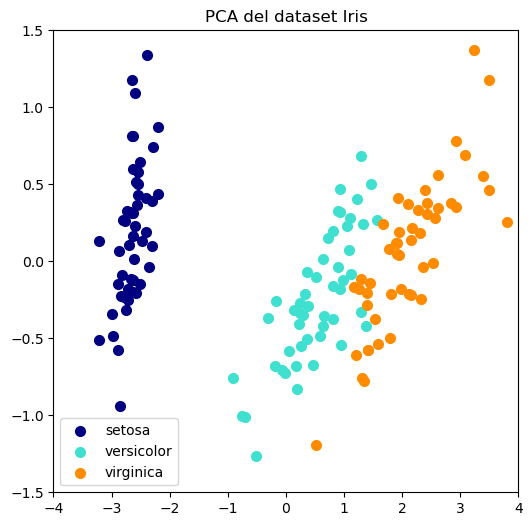

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, IncrementalPCA

# dividimos los datos en features y target
X = iris.data
y = iris.target

# Aplicamos IPCA
n_componentes = 2
ipca = IncrementalPCA(n_components=n_componentes, batch_size=10)
X_ipca = ipca.fit_transform(X)

# Aplicamos PCA
pca = PCA(n_components=n_componentes)
X_pca = pca.fit_transform(X)

# lista de colores para cada clase
colores = ['navy', 'turquoise', 'darkorange']

# creacion de visualizaciones
for X_tranformed, title in [(X_ipca, 'IPCA'), (X_pca, 'PCA')]:
    
    plt.figure(figsize=(6,6))
    for color, i, target_name in zip(colores, [0,1,2], iris.target_names):

        plt.scatter(
            X_tranformed[y == i, 0],
            X_tranformed[y == i, 1],
            color = color,
            lw = 2,
            label = target_name
        ) 

    if 'IPCA' in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + ' del dataset Iris\nError Absoluto Medio sin signo %.6f' % err)
    else:
        plt.title(title + ' del dataset Iris')
    
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.axis([-4,4,-1.5,1.5])

plt.show()

> El error absoluto medio es muy bajo lo que implica que ambos métodos son muy parecidos.

> IPCA aproxima bastante bien a PCA pero con menos consumo de memoria.

### División en Minilotes

El siguiente código divide el conjunto de entrenamiento MNIST en 100 minilotes (usando la función _array_split()_ de NumPy) y los envía a la clase _IncrementalPCA_ de _Scikit-Learn_ para reducir la dimensionalidad del conjunto de datos MNIST a 154 dimensiones. Se debe usar el método _partial_fit()_ para cada minilote.

In [8]:
from sklearn.decomposition import IncrementalPCA # metodo PCA incremental
from sklearn.datasets import fetch_openml # Conjunto de datos
import numpy as np

# cargar datos
mnist = fetch_openml('mnist_784', as_frame=False, parser="auto")

# dividir los datos en entrenamiento y prueba
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

# tamano del lote
n_batches = 100

# reducir a 154 componentes
inc_pca = IncrementalPCA(n_components=154)

# pasar a IPCA de lote en lote
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)


In [9]:
# verifiquemos dimensiones de los datos reducidos
X_reduced.shape

(60000, 154)

> Este set de datos presenta 784 variables, por lo que se redujo de 154 componentes de forma exitosa sin saturar la memoria del computador.

### Usando _memmap_

También podemos usar la clase _memmap_ de Numpy, que permite manipular una matriz grande almacenada en un archivo binario en el disco como si estuviera completamente en la 
memoria. La clase carga sólo los datos que necesita en la memoria, cuando los necesita.

En el siguiente ejemplo, creamos un archivo mapeado en memoria (_memmap_) y copiamos en él el conjunto de entrenamiento MNIST; luego llamamos a _flush()_ para asegurarnos de que cualquier 
dato que aún esté en el caché se guarde en el disco. En la vida real, X_train normalmente no encajaría en la memoria, por lo que lo cargarías fragmento por fragmento y guardarías cada fragmento en la parte derecha de la matriz _memmap_. Para que este método funcione correctamente debemos considerar lo siguiente:

- Tener guardado los datos en un archivo binario compatible.
- Conocer la forma y el tipo de dato del array para mapearlo correctamente.

In [10]:
# crear archivo memory-maped desde los datos de entrenamiento
filename = "my_mnist.mmap"
# definir tipo de dato (en MNIST son generalemtne float32)
# definir forma del array (60000, 784)
X_mmap = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)

# guardar los datos de entrenamiento en el archivo
X_mmap[:] = X_train

# asegurar que todos los datos se escriban al archivo .mmap
X_mmap.flush()

Procedemos a cargar el archivo _memmap_ y usarlo como una matriz NumPy normal. Dado que este algoritmo utiliza sólo una pequeña parte de la matriz en un momento dado, el uso de la memoria permanece bajo control. Esto hace posible llamar al método fit() habitual en lugar de 
_partial_fit()_, lo cual es bastante conveniente:

In [11]:
# Reabrir el archivo para solo lectura y uso en IPCA
# se reinterpreta con forma (-1, 784). -1 permite a numpy inferir la cantidad de filas
X_mmap = np.memmap(filename, dtype="float32", mode="readonly").reshape(-1, 784)

# calcular el tamano del lote para IPCA
batch_size = X_mmap.shape[0] // n_batches

# aplicar IPCA para reducir a 154 dimensiones
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mmap)

IncrementalPCA(batch_size=600, n_components=154)

> Pasamos de 784 a 154 dimensiones sin saturar la memoria

## Kernel PCA

Es una extensión del Análisis de Componentes Principales (PCA) que permite aplicar la técnica a datos no linealmente separables. Mientras que el PCA tradicional proyecta los datos en una base lineal, el Kernel PCA transforma primero los datos a un espacio de mayor dimensión (no lineal) y luego aplica PCA en ese nuevo espacio.

### En qué consiste?

1. KPCA utiliza una función kernel para mapear los datos a un espacio de características de mayor dimensión sin hacerlo explícitamente. Esto se conoce como el "truco del kernel".

2. Una vez en ese nuevo espacio (a través del kernel), aplica PCA como si fuera lineal, pero ahora puede capturar patrones no lineales.

3. No necesita conocer la función de mapeo gracias al truco del kernel, sólo necesitas calcular productos escalares entre puntos en el espacio transformado, lo cual se hace usando la función kernel directamente.

### Tipos comunes de Kernel

El tipo de kernel a utilizar va a depender de la forma en que se distribuyen los datos y entre los más comunes tenemos:

- __Lineal__: equivalente a PCA estándar. En scikit-learn 'linear'. Útil en datos que sean linealmente separables. Es el que utiliza por defecto PCA.

- __Polinomial__: permite capturar relaciones polinómicas no lineales. En scikit-learn 'poly'.

- __RBF__ (Radial Basis Function o Gaussiano): muy útil para datos con separación no lineal. En scikit-learn 'rbf'.

- __Sigmoide__: funciona cuando los datos tienen transiciones suaves como las que modelan las redes neuronales. En scikit-learn 'sigmoid'. 

- __Kernel personalizado__: Cuando necesitas un kernel específico para tu problema (por ejemplo, kernels basados en texto, grafos, o series temporales).

### Implementando KPCA con Scikit-Learn

Vamos a mostrar la ventaja de usar un kernel al proyectar datos mediante un PCA. Creamos un conjunto de datos compuesto por dos circulos anidados en el que claramente se tratan de datos no lineales. 

In [12]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# crear los datos de prueba. Features y target
# factor controla el radio relativo entre circulos
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.05, random_state=42)

# dividir datos en entrenamiento y prueba
# stratify asegura que la proporcion de clases e mantenga igual en ambos circulos
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

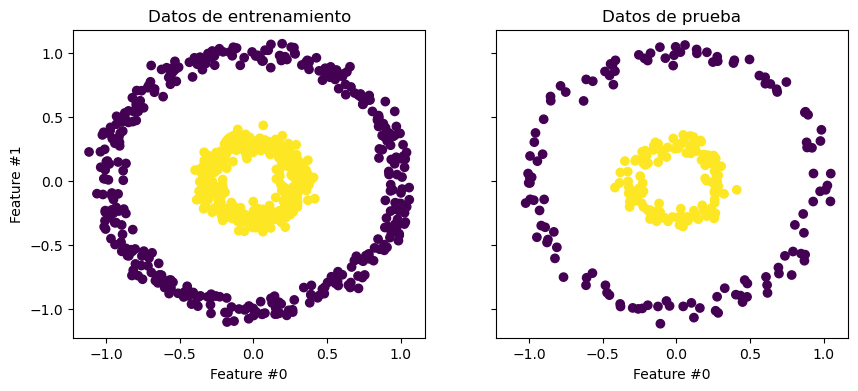

In [13]:
# visualicemos los datos generados
import matplotlib.pyplot as plt

_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(10, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Datos de entrenamiento")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Datos de prueba")

> Las muestras de cada clase no se pueden separar linealmente.

Ahora, vamos a implementar PCA y Kernel PCA para ver su efectos. Para el kernel utilizamos 'rbf' ya que concuerda con la forma que presentan los datos. 

In [14]:
from sklearn.decomposition import PCA, KernelPCA

# definimos PCA
pca = PCA(n_components=2)

# definimos KPCA
kpca = KernelPCA(
    n_components=None,
    kernel='rbf',
    gamma=9,                   # controla la forma del kernel
    fit_inverse_transform=True, # permite aroximar el mapeo inverso dese el espacio reucido al original
    alpha=0.1                   # regula la reconstruccion inversa
)

# obtener version reducida linealmente de los datos de prueba 
X_test_pca = pca.fit(X_train).transform(X_test)
# obtener version reducida en un espacio no lineal transformado de los datos de prueba
X_test_kpca = kpca.fit(X_train).transform(X_test)


Visualicemos los datos con los métodos implementados para compararlos.

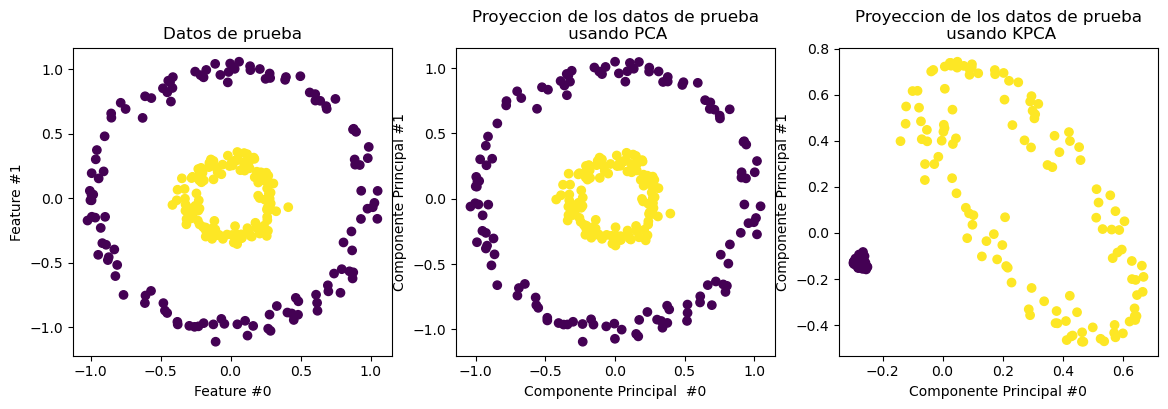

: 

In [ ]:
# configuracion de graficos
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=3, figsize=(14, 4)
)

# grafico de los datos de prueba originales
orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Datos de prueba")

# grafico de los datos de prueba con PCA
pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
pca_proj_ax.set_ylabel("Componente Principal #1")
pca_proj_ax.set_xlabel("Componente Principal  #0")
pca_proj_ax.set_title("Proyeccion de los datos de prueba\n usando PCA")

# grafico de los datos de prueba con KPCA
kernel_pca_proj_ax.scatter(X_test_kpca[:, 0], X_test_kpca[:, 1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Componente Principal #1")
kernel_pca_proj_ax.set_xlabel("Componente Principal #0")
_ = kernel_pca_proj_ax.set_title("Proyeccion de los datos de prueba\n usando KPCA")

> PCA transforma los datos linealmente. Esto significa que el sistema de coordenadas se centrará, se reescalará en cada componente con respecto a su varianza y, finalmente, se rotará. Sin embargo, en la grafica central observamos que no hay cambios en el escalamiento, solamente han sido rotados.  Dicha proyección no sería útil si se definiera un clasificador lineal para distinguir muestras de ambas clases.

> KPCA permite realizar una proyección no lineal. Al usar un kernel RBF, esperamos que la proyección despliegue el conjunto de datos, conservando aproximadamente las distancias relativas de los pares de puntos de datos cercanos en el espacio original. En la grafica de la derecha se evidencia que las muestras de una clase dada están más próximas entre sí que las muestras de la clase opuesta, lo que desenreda ambos conjuntos de muestras. Ahora, podemos usar un clasificador lineal para separar las muestras de las dos clases.